## ML Project

We start by importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("StressLevelDataset.csv")
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


### Basic Analysis of Dataset

In [3]:
# data on all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [4]:
# statistics of all features
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


### Checking for null values

In [5]:
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

### Checking existence of duplicates:

In [6]:
df = df.drop_duplicates()
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


### Outlier Detection and Removal

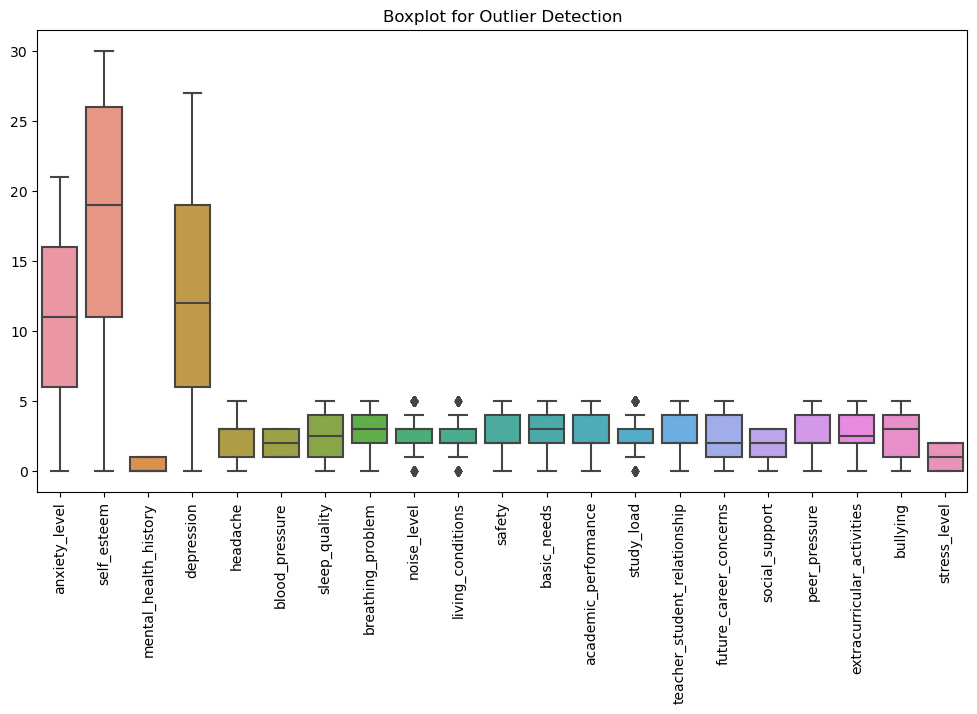

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


We notice a few outliers in the boxplot. Capping can be done to ensure the outliers do not affect the model.

We also notice that the ranges of some features are quite large compared to others. Standardization can be done later to make sure all features lie between -1 and 1.

In [8]:
# Capping outliers based on IQR for numerical columns
for column in df.columns:
    if column != 'stress_level':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_cap = Q1 - 1.5 * IQR
        upper_cap = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_cap, int(lower_cap), df[column])
        df[column] = np.where(df[column] > upper_cap, int(upper_cap), df[column])

print("\nSummary of data after capping outliers:")
df.describe()


Summary of data after capping outliers:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.524545,2.488182,...,2.772727,2.772727,2.505455,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.134430,1.064288,...,1.433761,1.414594,1.131470,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


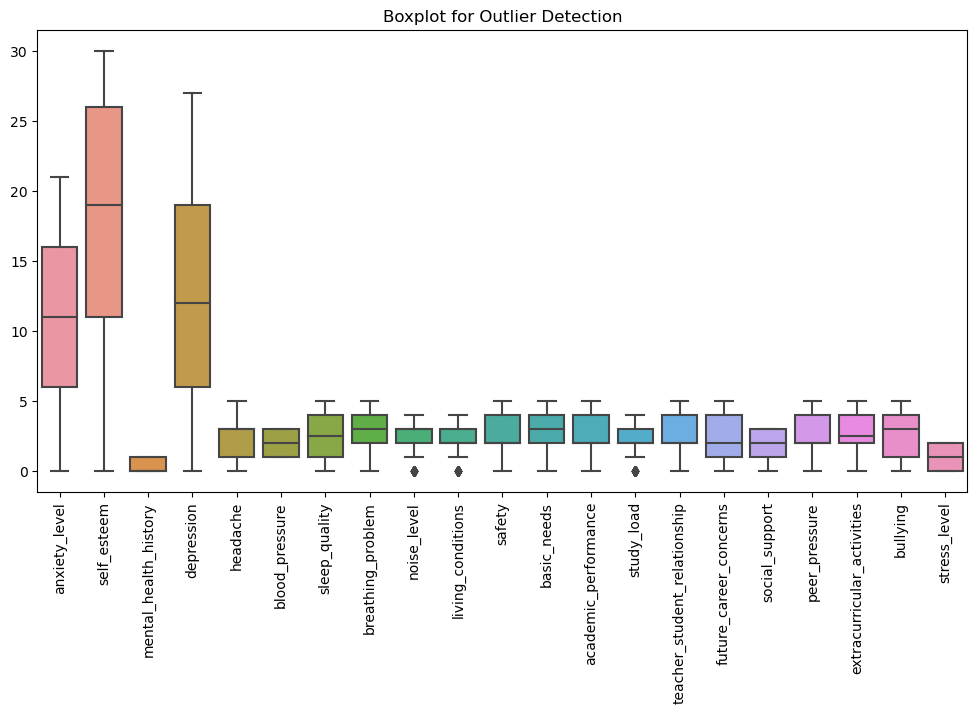

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

### Exploratory Data Analysis

#### Univariate Analysis

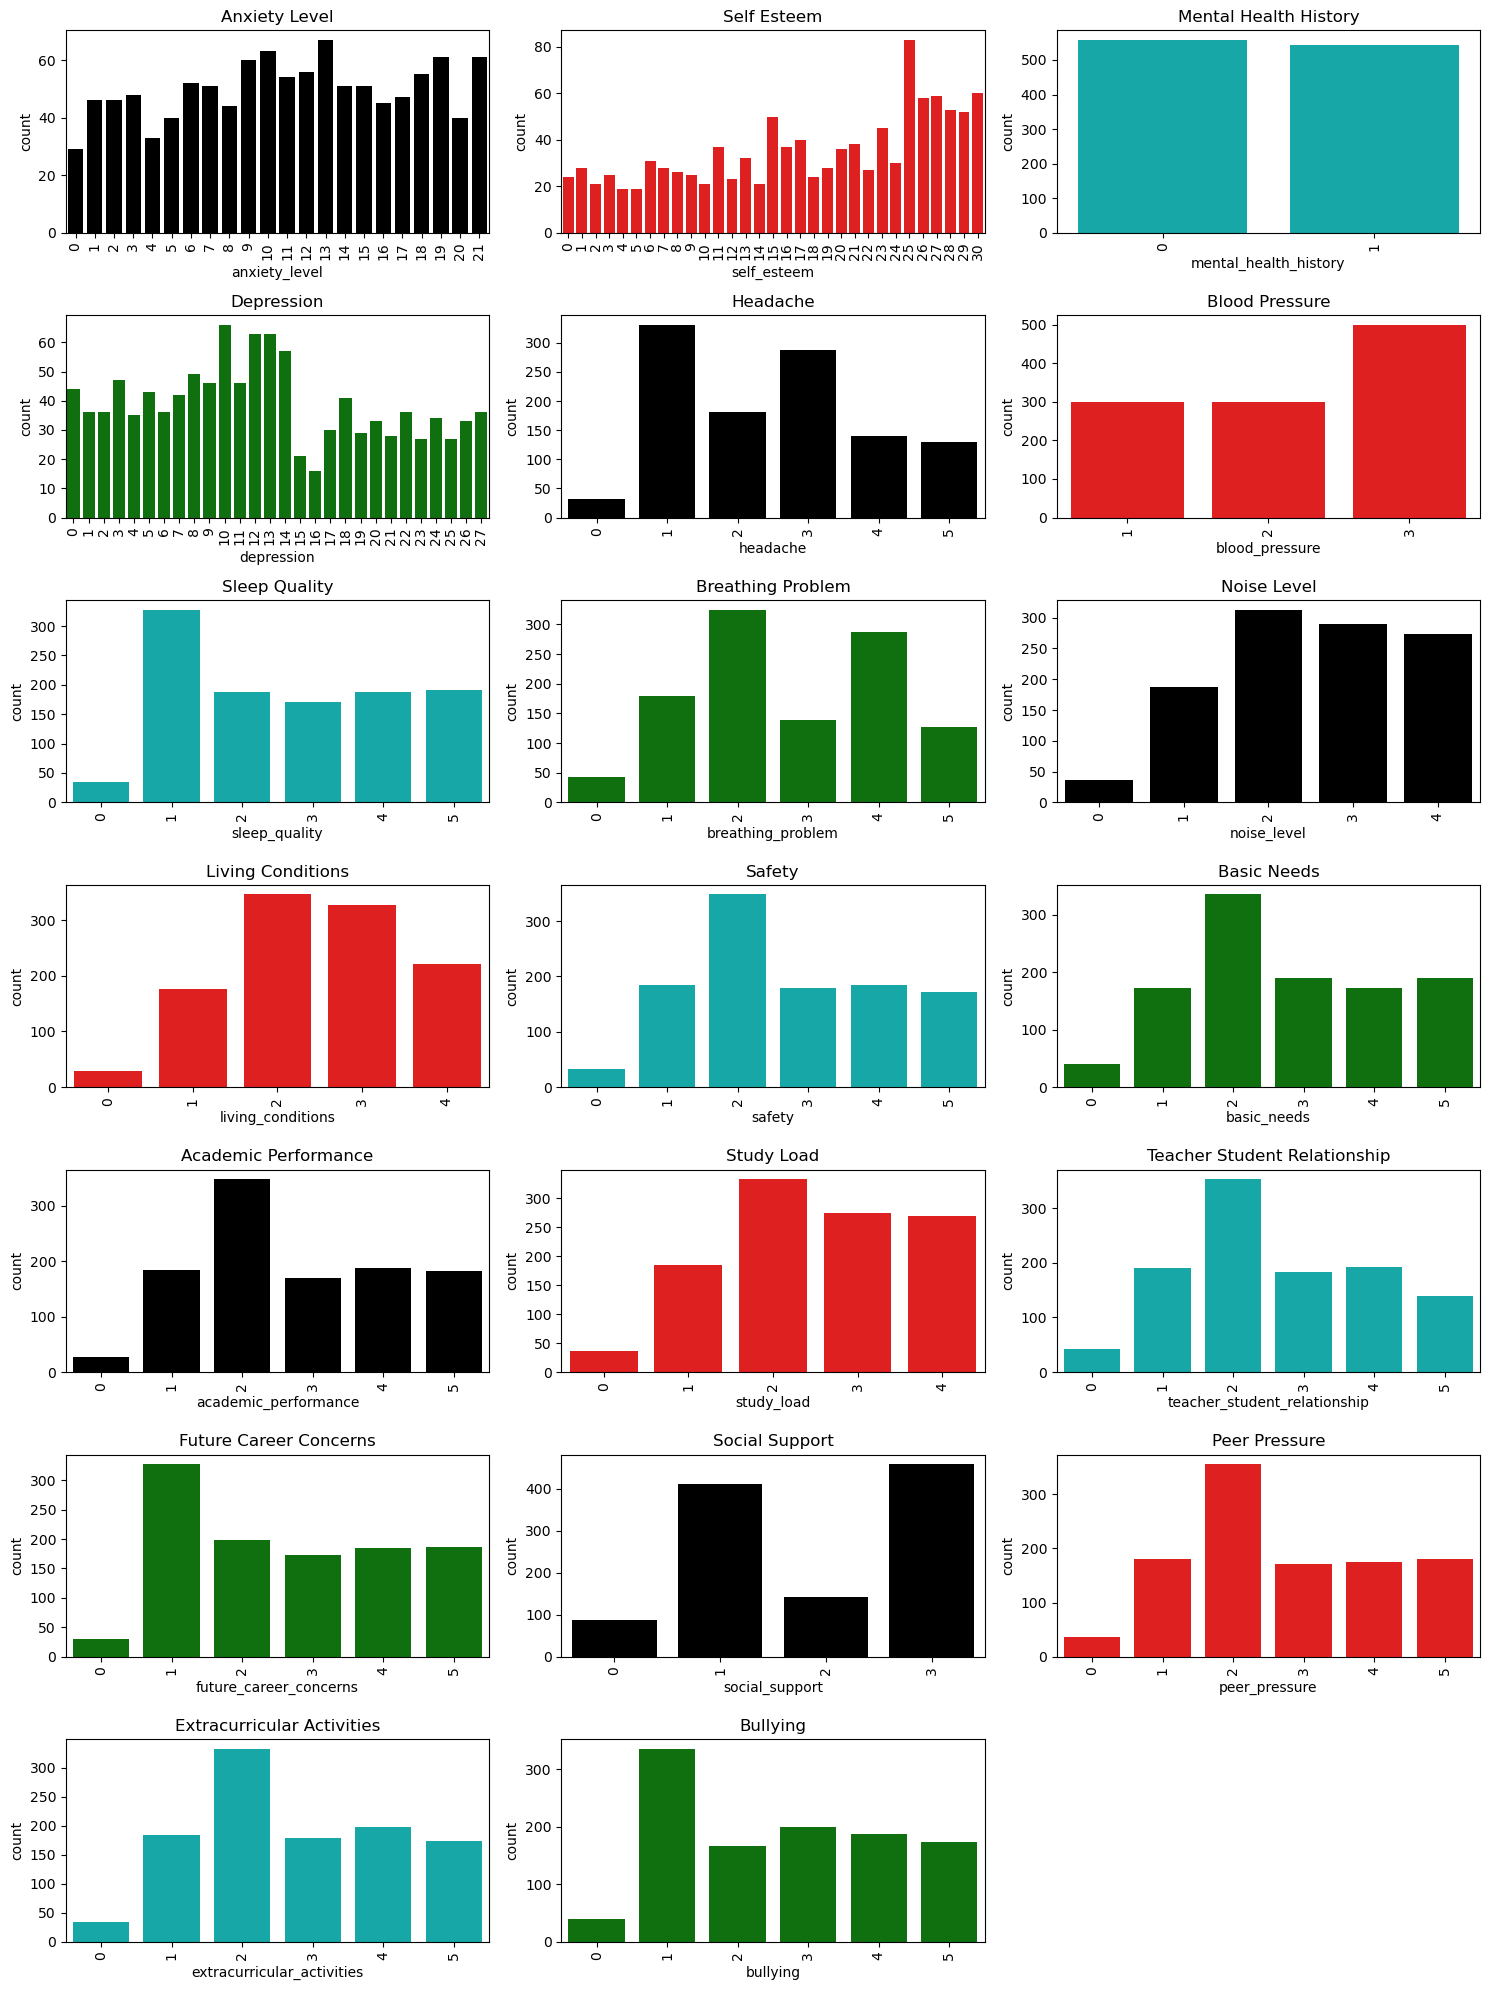

In [10]:
# plotting distribution of values across each feature
colors = ['k', 'r', 'c', 'g']
plt.figure(figsize=(15, 20))
for i in range(len(df.columns)-1):
    plt.subplot(7, 3, i+1)
    plt.title(" ".join(df.columns[i].split('_')).title())
    plt.xticks(rotation=90)
    sns.countplot(x=df[df.columns[i]], color=colors[i % len(colors)])
plt.tight_layout()
plt.show()

##### We see that the target variable is balanced since we have almost equal number of datapoints pread across all 3 classes

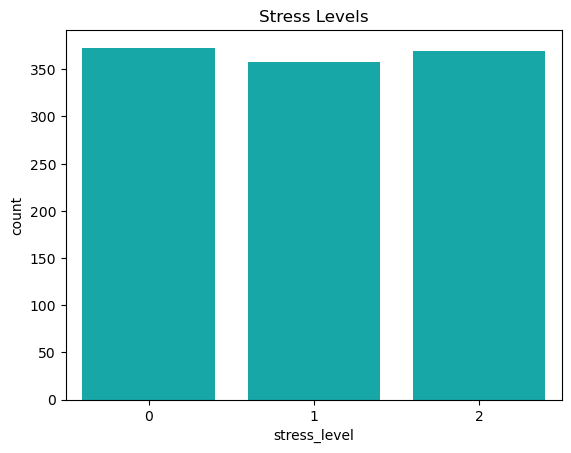

In [11]:
sns.countplot(x=df['stress_level'], color='c')
plt.title('Stress Levels')
plt.show()

#### Bivariate Analysis

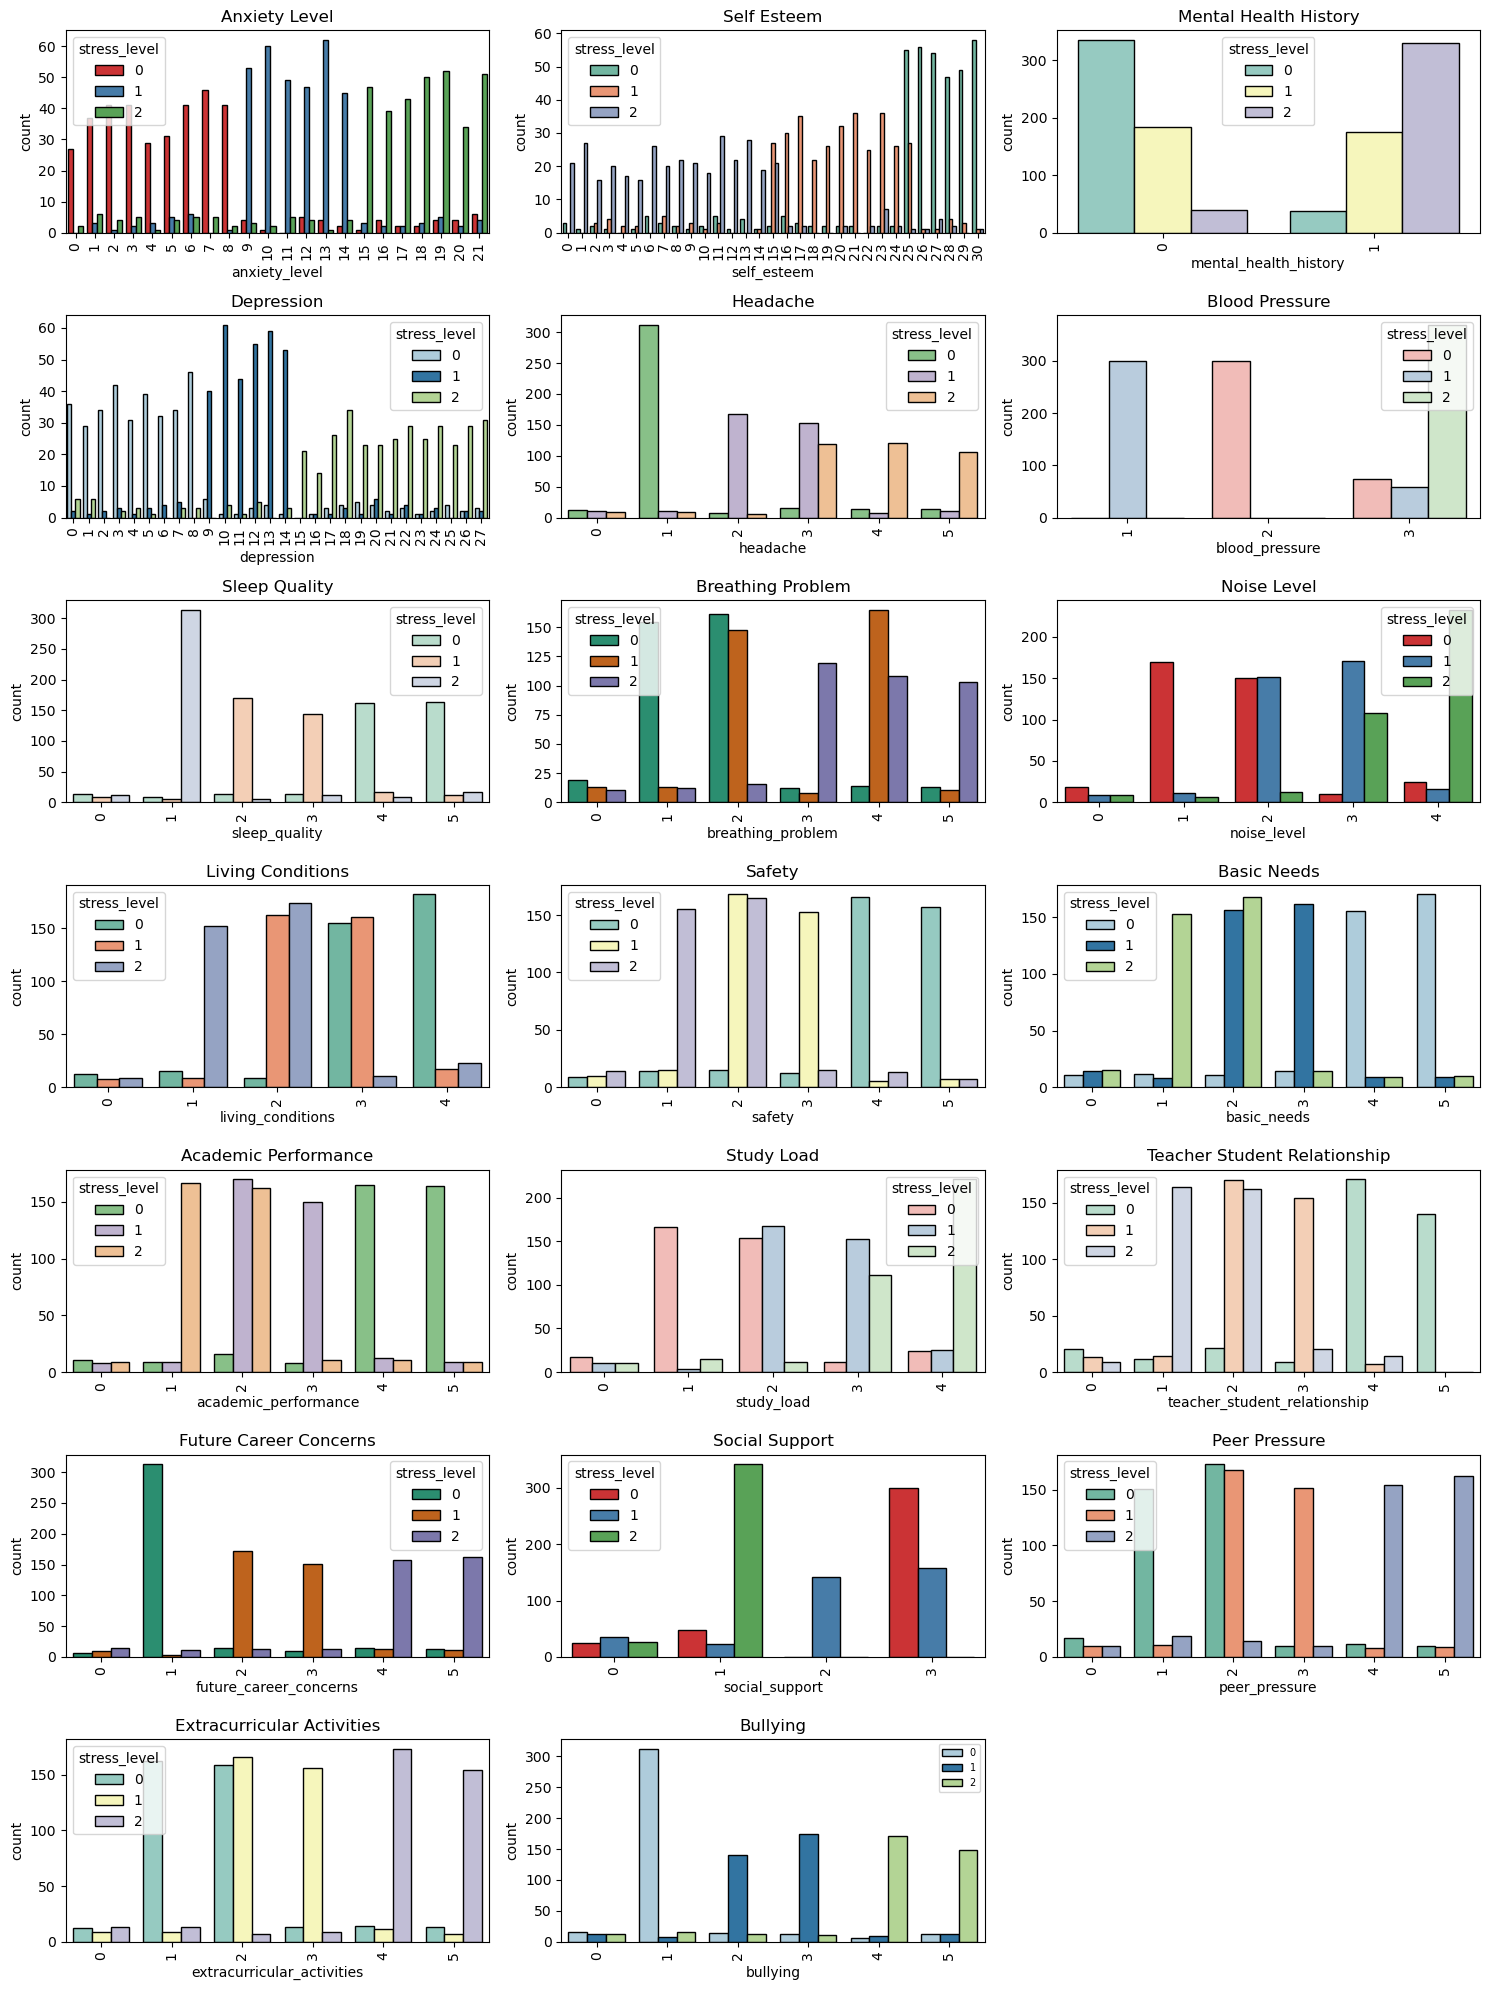

In [12]:
# plotting count of each variable vs target
palette = ['Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Pastel1', 'Pastel2', 'Dark2']
plt.figure(figsize=(15, 20))
for i in range(len(df.columns)-1):
    plt.subplot(7, 3, i+1)
    plt.title(" ".join(df.columns[i].split('_')).title())
    sns.countplot(x=df.columns[i], hue='stress_level', data=df, edgecolor='black', palette=palette[i % len(palette)])
    plt.xticks(rotation=90)
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

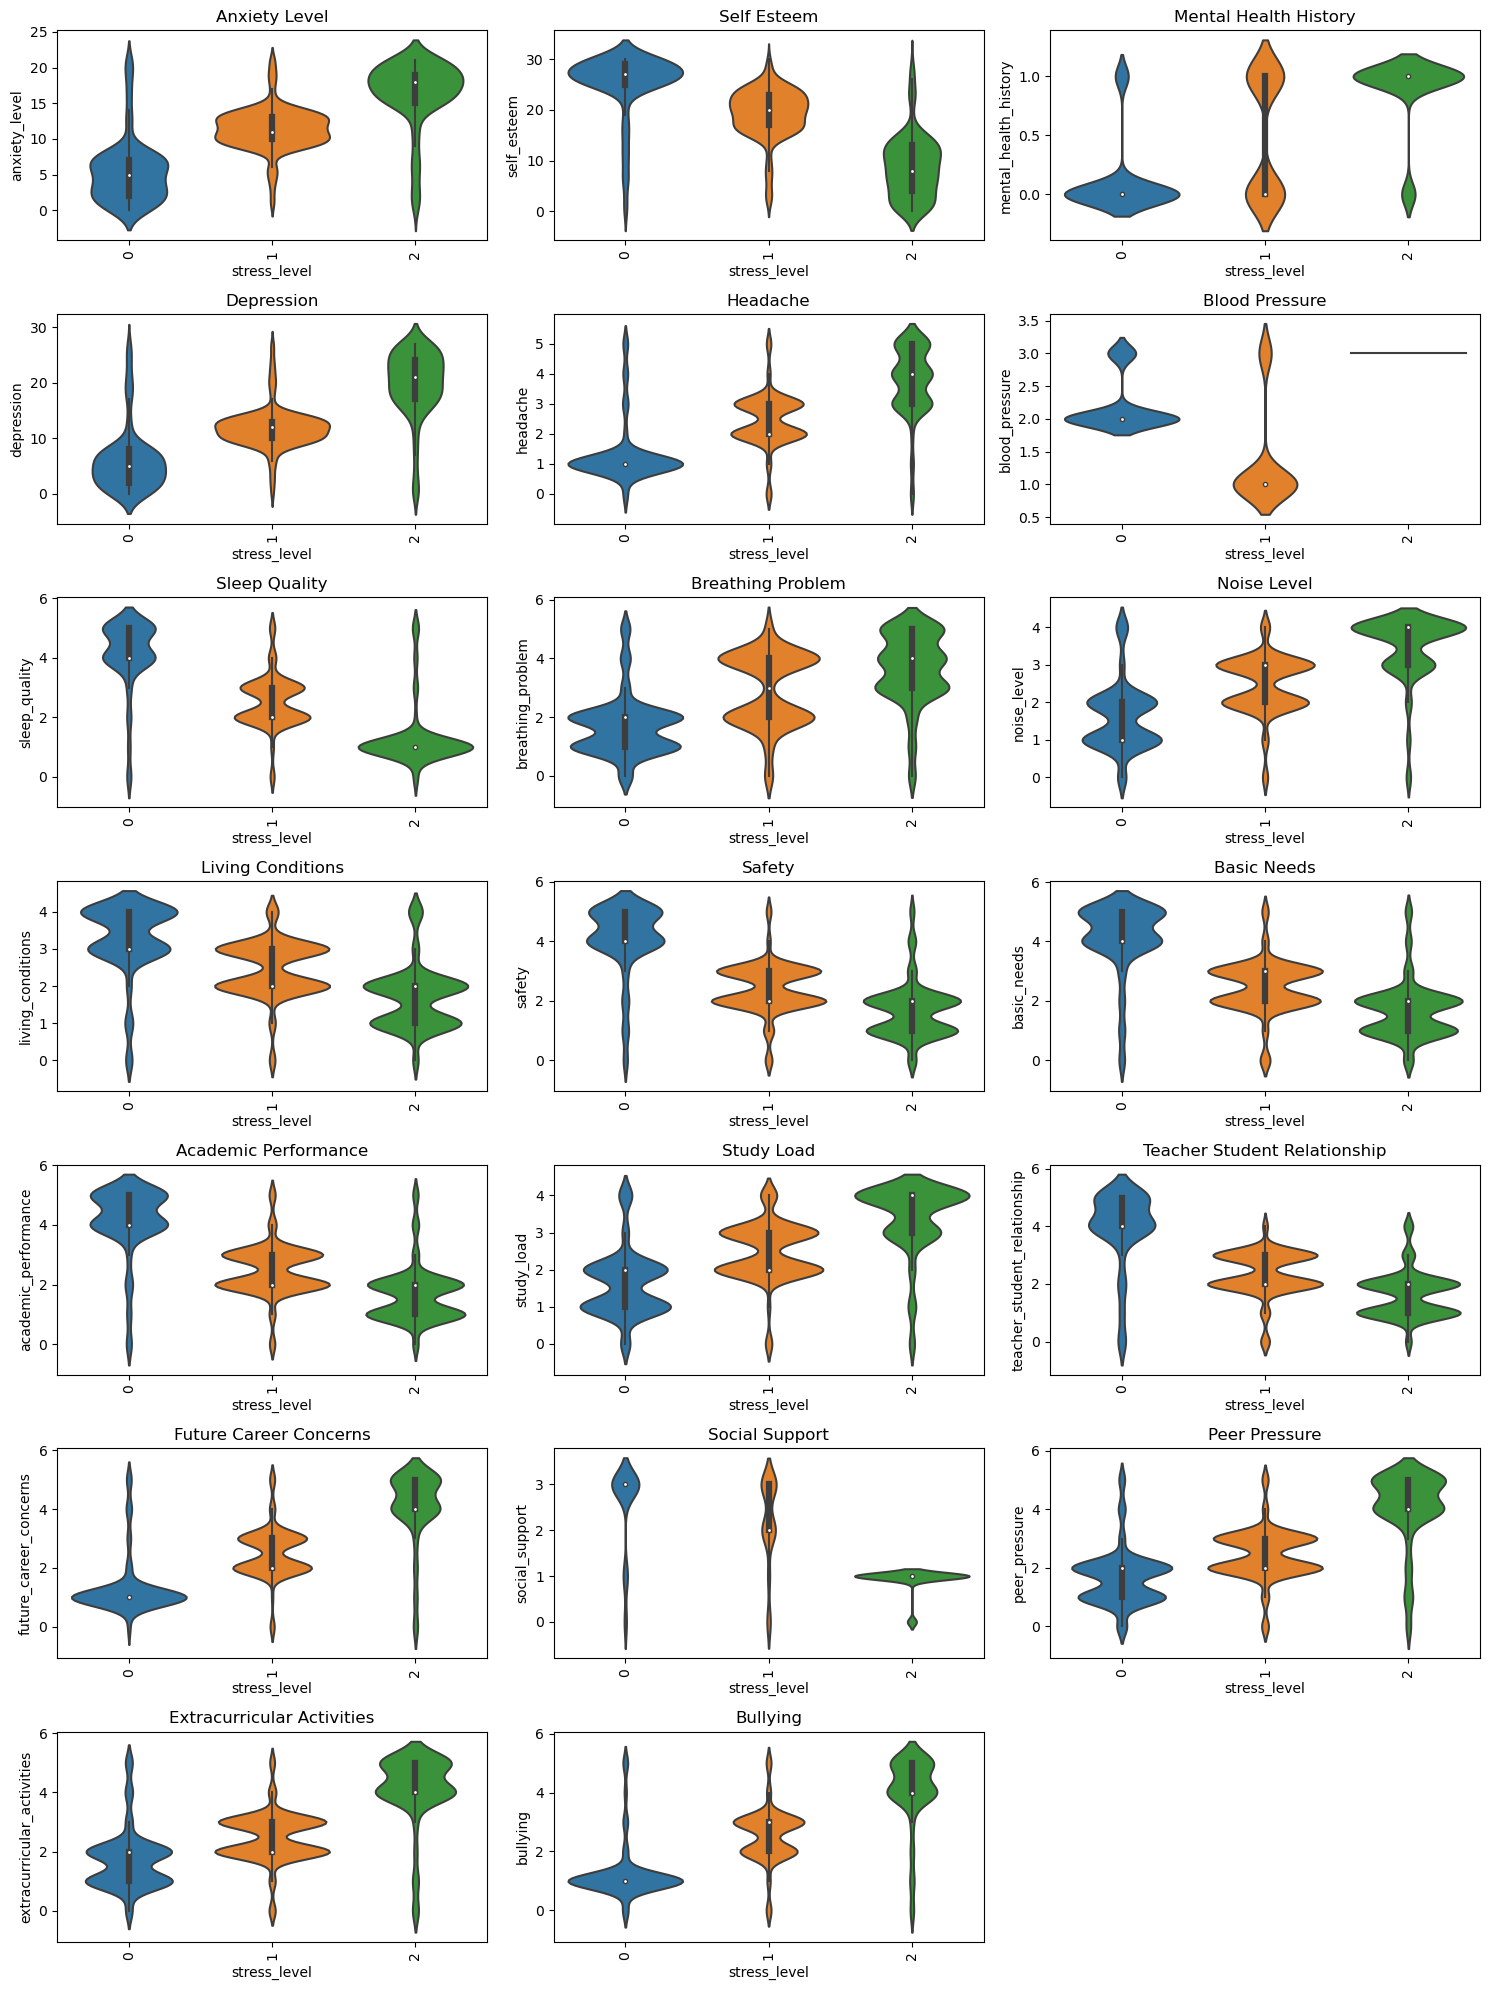

In [13]:
# plotting violin plots of each feature vs target to see the data distribution against target for each feature 
palette = ['Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Pastel1', 'Pastel2', 'Dark2']
plt.figure(figsize=(15, 20))
for i in range(len(df.columns)-1):
    plt.subplot(7, 3, i+1)
    plt.title(" ".join(df.columns[i].split('_')).title())
    sns.violinplot(data=df, y=df.columns[i], x='stress_level')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the violinplots, it can be inferred that anxiety level, self esteem, depression, sleep quality, future career concerns and bullying show most variance between stress levels.

#### Multivariate Analysis

We plot the heatmap for the dataset to see the correlation between features

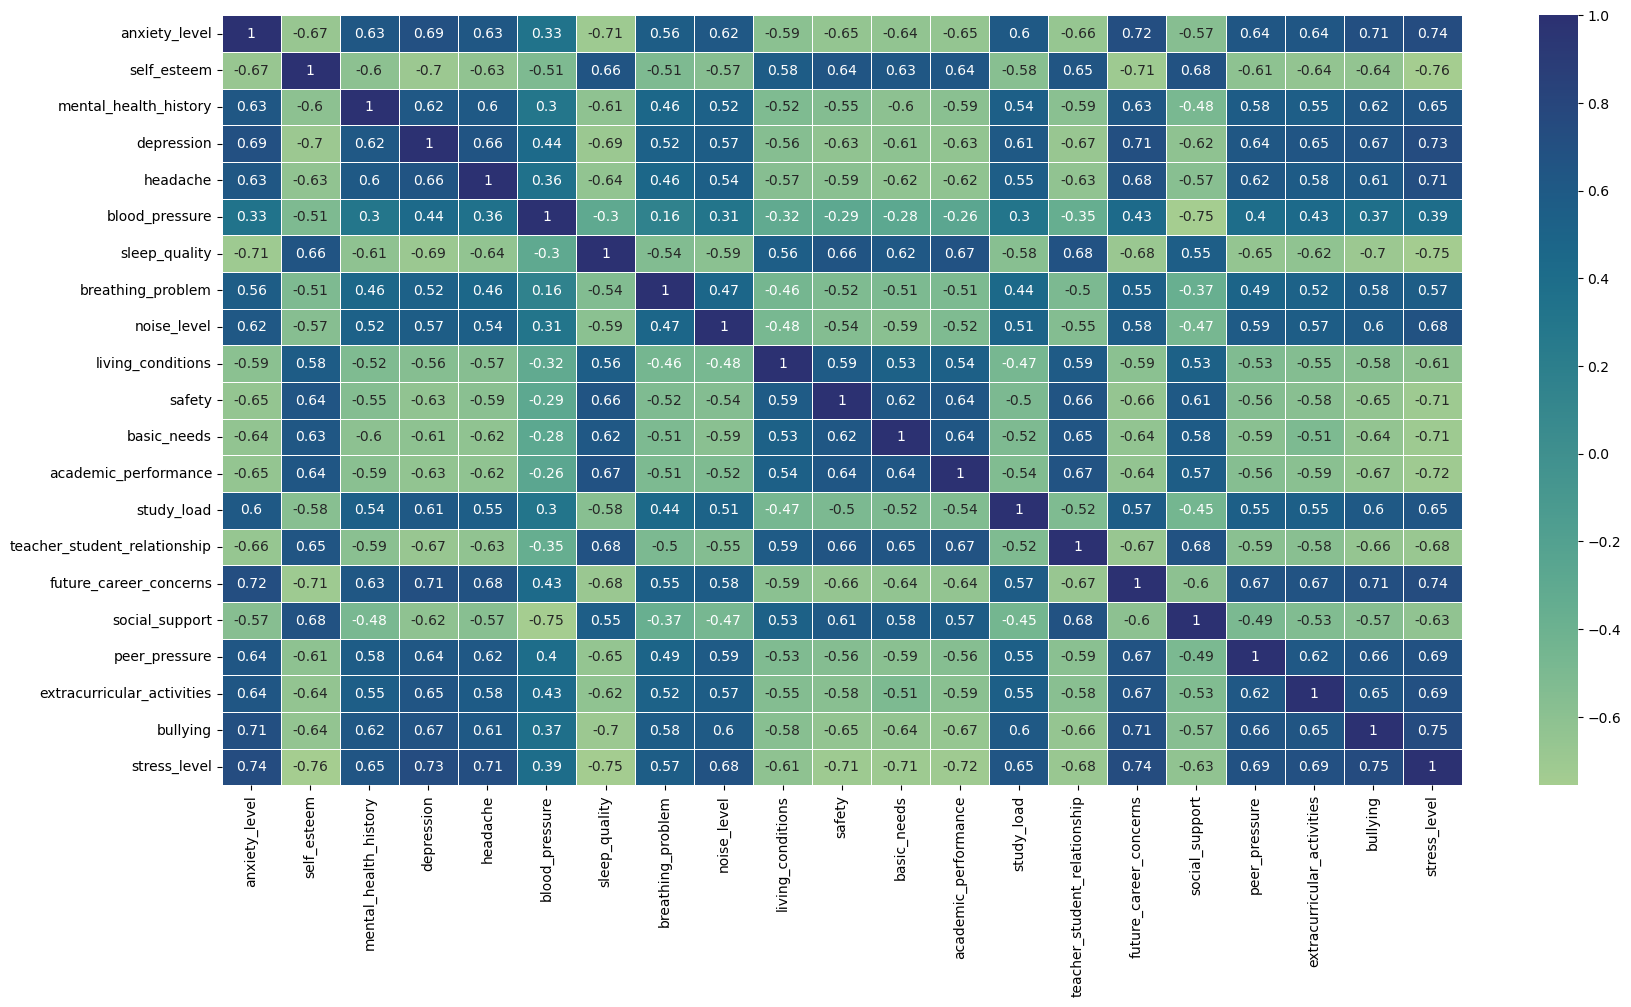

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap='crest')
plt.show()

We see that there are many features with correlation of above 0.7 to stress levels but the most prominent ones with correlation of >= 0.75 are self esteem, bullying and sleep quality. The highest correlation between any two features is between blood pressure and social support with a correlation of 75%. No two features are too correlated.

On checking whether the dataset is skewed for any feature, we see that none are too skewed, self esteem has the highest skew with a negative skew of 0.39

In [15]:
df.skew().sort_values()

self_esteem                    -0.396539
blood_pressure                 -0.351186
noise_level                    -0.236904
study_load                     -0.202337
living_conditions              -0.193663
social_support                 -0.180958
anxiety_level                  -0.082612
breathing_problem              -0.001625
stress_level                    0.006728
mental_health_history           0.029134
extracurricular_activities      0.135604
basic_needs                     0.135859
bullying                        0.175348
sleep_quality                   0.177975
academic_performance            0.184316
safety                          0.188097
peer_pressure                   0.194719
teacher_student_relationship    0.198016
future_career_concerns          0.204276
depression                      0.216638
headache                        0.270494
dtype: float64

Exploring how correlated each feature is with the target:

In [16]:
df.corr()['stress_level'].sort_values()

self_esteem                    -0.756195
sleep_quality                  -0.749068
academic_performance           -0.720922
safety                         -0.709602
basic_needs                    -0.708968
teacher_student_relationship   -0.680163
social_support                 -0.632497
living_conditions              -0.614988
blood_pressure                  0.394200
breathing_problem               0.573984
study_load                      0.645979
mental_health_history           0.648644
noise_level                     0.680487
peer_pressure                   0.690684
extracurricular_activities      0.692977
headache                        0.713484
depression                      0.734379
anxiety_level                   0.736795
future_career_concerns          0.742619
bullying                        0.751162
stress_level                    1.000000
Name: stress_level, dtype: float64

### Standardization of the Features

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
for col in df.columns:
    if col != 'stress_level':
        df[col] = sc.fit_transform(np.array(df[col]).reshape(-1, 1))

In [18]:
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0.480208,0.248612,-0.985559,-0.201393,-0.360741,-1.418416,-0.426445,0.890211,-0.462597,0.481121,...,-0.539196,0.160736,-0.446927,0.254213,0.229550,0.112839,0.186334,0.164249,-0.403377,1
1,0.643746,-1.093590,1.014653,0.316508,1.768859,0.981981,-1.072574,0.890211,0.419304,-1.398925,...,-0.539196,-1.253741,1.321489,-1.190927,1.537869,-0.841952,0.888277,1.575763,1.557071,2
2,0.153131,0.024912,1.014653,0.187033,-0.360741,-1.418416,-0.426445,-0.538282,-0.462597,-0.458902,...,-0.539196,-0.546502,0.437281,0.254213,-0.424609,0.112839,0.186334,-0.541508,-0.403377,1
3,0.807284,-0.646189,1.014653,0.316508,1.058992,0.981981,-1.072574,0.175964,1.301205,-0.458902,...,-0.539196,-0.546502,1.321489,-1.190927,0.883709,-0.841952,0.888277,0.870006,1.557071,2
4,0.807284,1.143414,-0.985559,-0.719293,-0.360741,0.981981,1.511942,-1.252529,0.419304,-0.458902,...,0.158587,0.867974,0.437281,-1.190927,-0.424609,-0.841952,1.590220,-1.953023,1.557071,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.010407,-0.086938,-0.985559,0.187033,0.349125,-1.418416,0.219684,-0.538282,-0.462597,-0.458902,...,0.158587,-0.546502,-0.446927,-0.468357,0.229550,1.067629,-0.515609,0.164249,0.250106,1
1096,-0.337484,-0.646189,-0.985559,-0.589818,-1.780475,0.981981,-1.718703,-1.966776,-2.226399,-1.398925,...,0.856371,-1.960979,-1.331135,-1.190927,-1.078768,-0.841952,0.186334,0.870006,0.250106,2
1097,-1.155175,0.919713,-0.985559,-1.237193,-1.070608,-0.218218,1.511942,-0.538282,-0.462597,0.481121,...,0.856371,1.575213,-1.331135,0.976783,-1.078768,1.067629,-1.217552,-0.541508,-1.056860,0
1098,1.624976,-1.988391,1.014653,0.834408,1.768859,0.981981,-1.072574,0.890211,0.419304,-1.398925,...,-1.236980,-0.546502,1.321489,-1.190927,0.883709,-0.841952,0.888277,0.870006,0.903589,2


### Feature Selection/Extraction

In [19]:
X=df.drop('stress_level',axis=1)
y=df['stress_level']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [22]:
X_train.shape

(880, 20)

Filter Method(ANOVA (f-test))

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

# 2. Select best features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

selected_features1= X_train.columns[selector.get_support()]

kbest_feats=[]

for feat in selected_features1:
    kbest_feats.append(feat)
print(f"Top 10 features selected by SelectKBest (ANOVA F-test):")
print(kbest_feats)


Top 10 features selected by SelectKBest (ANOVA F-test):
['self_esteem', 'depression', 'blood_pressure', 'sleep_quality', 'safety', 'basic_needs', 'academic_performance', 'future_career_concerns', 'extracurricular_activities', 'bullying']


Wrapper Method(Recursive Feature Elimination (RFE))

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga', random_state=42)
rfe_selector = RFE(estimator=base_model, n_features_to_select=10)
rfe_selector.fit_transform(X_train_scaled,y_train)

selected_mask2 = rfe_selector.get_support()   # Boolean mask
selected_features2 = X_train.columns[selected_mask2]

rfe_feats=[]

for feat in selected_features2:
    rfe_feats.append(feat)
print(f"Top 10 features selected by RFE:")
print(rfe_feats)

Top 10 features selected by RFE:
['self_esteem', 'mental_health_history', 'blood_pressure', 'noise_level', 'academic_performance', 'study_load', 'teacher_student_relationship', 'social_support', 'extracurricular_activities', 'bullying']


Embedded Methods(LASSO (L1 Regularization))

In [29]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel

# Define pipeline with L1-penalized Logistic Regression
clf = LogisticRegressionCV(
    cv=5,
    penalty='l1',
    solver='saga',
    max_iter=1000,
    random_state=42
)
clf.fit(X_train_scaled,y_train)

coefs_abs = np.abs(clf.coef_).sum(axis=0)  # sum across classes if multi-class
top10_idx = np.argsort(coefs_abs)[-10:][::-1]  # indices of top 10 features, descending
top10_features = X_train.columns[top10_idx]
lasso_feats=[]
#Print top 10 features
print("Top 10 features selected by L1 LogisticRegression:")
for f in top10_features:
    lasso_feats.append(f)
print(lasso_feats)

Top 10 features selected by L1 LogisticRegression:
['blood_pressure', 'social_support', 'teacher_student_relationship', 'self_esteem', 'noise_level', 'study_load', 'extracurricular_activities', 'mental_health_history', 'safety', 'basic_needs']


In [30]:
kbest_feats=set(kbest_feats)

rfe_feats=set(rfe_feats)

lasso_feats=set(lasso_feats)
# Common features
common_feats = kbest_feats & rfe_feats & lasso_feats
c=list(common_feats)

print("✅ Features selected by ALL 3 methods:", common_feats)


✅ Features selected by ALL 3 methods: {'blood_pressure', 'extracurricular_activities', 'self_esteem'}


In [31]:
from sklearn.model_selection import cross_val_score

# Function to evaluate features using cross-validation
def evaluate_features(X, y, feature_set, label):
    X_selected = X[list(feature_set)]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

# Define and train logistic regression
    clf1 = LogisticRegression(max_iter=1000,multi_class='multinomial',solver='saga',random_state=42)
    clf1.fit(X_scaled, y)
    
    scores = cross_val_score(clf1, X_selected, y, cv=5, scoring='accuracy')
    print(f"{label} - CV Accuracy: {scores.mean():.4f}")

# Evaluate each feature set
evaluate_features(X, y, X.columns, "All Features")
evaluate_features(X, y, kbest_feats, "SelectKBest")
evaluate_features(X, y, rfe_feats, "RFE")
evaluate_features(X, y, lasso_feats, "Lasso (L1)")
evaluate_features(X, y, common_feats, "Common (All 3 methods)")


All Features - CV Accuracy: 0.8836
SelectKBest - CV Accuracy: 0.8700
RFE - CV Accuracy: 0.8927
Lasso (L1) - CV Accuracy: 0.8873
Common (All 3 methods) - CV Accuracy: 0.8900


Based on the results, the cross-validation (CV) accuracy is highest when using the features selected through Recursive Feature 
Elimination (RFE). Therefore, these features are chosen for building the final model, as they yield the best overall performance.

Final Test Accuracy: 0.8818181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        76
           1       0.89      0.89      0.89        73
           2       0.90      0.87      0.89        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220


Confusion Matrix (as array):
 [[67  4  5]
 [ 6 65  2]
 [ 5  4 62]]


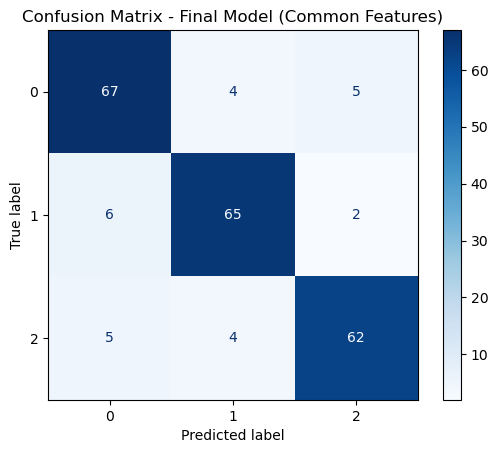

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

X_train_1 = X_train[list(rfe_feats)]
X_test_1 = X_test[list(rfe_feats)]

final_model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
final_model.fit(X_train_1, y_train)

y_pred = final_model.predict(X_test_1)

#Print accuracy
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))

#Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix (as array):\n", cm)

#Visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Final Model (Common Features)")
plt.show()

